In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Data Science/Dataset/data_ce72_1424.xlsx', header = 0, index_col= 0)
df

,Year,HS Code,Pod,Month,Revenue
0,2014,[72] Iron and steel,HALIM PERDANA KUSUMA (U),Januari,0.000000e+00
1,2014,[72] Iron and steel,KOTABARU,Januari,2.503611e+06
2,2014,[72] Iron and steel,MUNTOK,Januari,0.000000e+00
3,2014,[72] Iron and steel,TANJUNG EMAS,Januari,0.000000e+00
4,2014,[72] Iron and steel,SOEKARNO-HATTA (U),Januari,6.291000e+03
...,...,...,...,...,...
150,2024,[72] Iron and steel,BAHUDOPI,Desember,1.789246e+08
151,2024,[72] Iron and steel,MAKASSAR,Desember,3.007411e+07
152,2024,[72] Iron and steel,MOROWALI,Desember,1.840185e+08
153,2024,[72] Iron and steel,KOLONODALE,Desember,2.979315e+08


In [3]:
df_p = df.drop(columns=['HS Code', 'Pod'])
urutan_bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
df_p['Month'] = pd.Categorical(df_p['Month'], categories=urutan_bulan, ordered=True)
df_p = df_p.groupby(['Year', 'Month']).sum()
df_p = df_p.sort_values(by=['Year', 'Month'])
df_p

<ipython-input-3-e441f998147f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_p = df_p.groupby(['Year', 'Month']).sum()


Revenue
Year Month                  
2014 Januari    3.317478e+06
     Februari   4.449040e+05
     Maret      2.460130e+05
     April      1.453440e+05
     Mei        2.834750e+05
...                      ...
2024 Agustus    1.087645e+09
     September  1.367602e+09
     Oktober    1.480657e+09
     November   1.657954e+09
     Desember   1.767015e+10

[132 rows x 1 columns]

# Uji Stasioner

In [ ]:
result = adfuller(df_p['Revenue'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.939752980010225
p-value: 0.998589359853162


In [9]:
def test_stationarity(data_diff):
    result = adfuller(data_diff)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Data sudah stasioner.")
    else:
        print("Data belum stasioner.")

In [ ]:
for i in range(1, 100):
  print(f"Differencing ke-{i}")
  data_diff = df_p['Revenue'].diff(i).dropna()
  test_stationarity(data_diff)
  print("\n")


Differencing ke-1
ADF Statistic: -2.1062968172997887
p-value: 0.2419901697573229
Data belum stasioner.


Differencing ke-2
ADF Statistic: -2.226977446422847
p-value: 0.19660028061113882
Data belum stasioner.


Differencing ke-3
ADF Statistic: -2.006412576557586
p-value: 0.2837685054795497
Data belum stasioner.


Differencing ke-4
ADF Statistic: -2.24253108705502
p-value: 0.19117267179446934
Data belum stasioner.


Differencing ke-5
ADF Statistic: -2.7270580425768074
p-value: 0.06947193616915617
Data belum stasioner.


Differencing ke-6
ADF Statistic: -0.7713855551943098
p-value: 0.8273832024296724
Data belum stasioner.


Differencing ke-7
ADF Statistic: -1.6398200698078027
p-value: 0.46235481314360166
Data belum stasioner.


Differencing ke-8
ADF Statistic: -2.287181758931083
p-value: 0.176135442256182
Data belum stasioner.


Differencing ke-9
ADF Statistic: -2.0675336753656
p-value: 0.2577682124617507
Data belum stasioner.


Differencing ke-10
ADF Statistic: -2.3059497866414795
p-valu

In [4]:
df_p = df_p.reset_index()
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Year     132 non-null    int64   
 1   Month    132 non-null    category
 2   Revenue  132 non-null    float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 2.7 KB


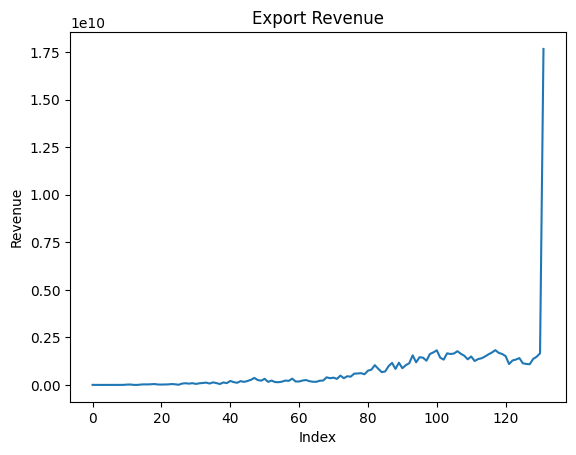

In [5]:
plt.plot(df_p['Revenue'])
plt.title('Export Revenue')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.show()


In [6]:
print(df_p['Revenue'].isnull().sum())  # Cek jumlah NaN
print(df_p.dtypes)  # Cek tipe data


0
Year          int64
Month      category
Revenue     float64
dtype: object


In [27]:
df_p['BoxCoxRevenue'], fitted_lambda = stats.boxcox(df_p['Revenue'])


print(f"Fitted Lambda: {fitted_lambda}")

Fitted Lambda: 0.9993463487158512


In [10]:
test_stationarity(df_p['BoxCoxRevenue'].dropna())

ADF Statistic: -0.09306128659220836
p-value: 0.9501252855542166
Data belum stasioner.


In [11]:
df_p['SeasonalDiffRevenue'] = df_p['BoxCoxRevenue'] - df_p['BoxCoxRevenue'].shift(12)
# Uji ADF lagi pada data differenced musiman
test_stationarity(df_p['SeasonalDiffRevenue'].dropna())

ADF Statistic: -3.693581047655053
p-value: 0.004204353749181702
Data sudah stasioner.


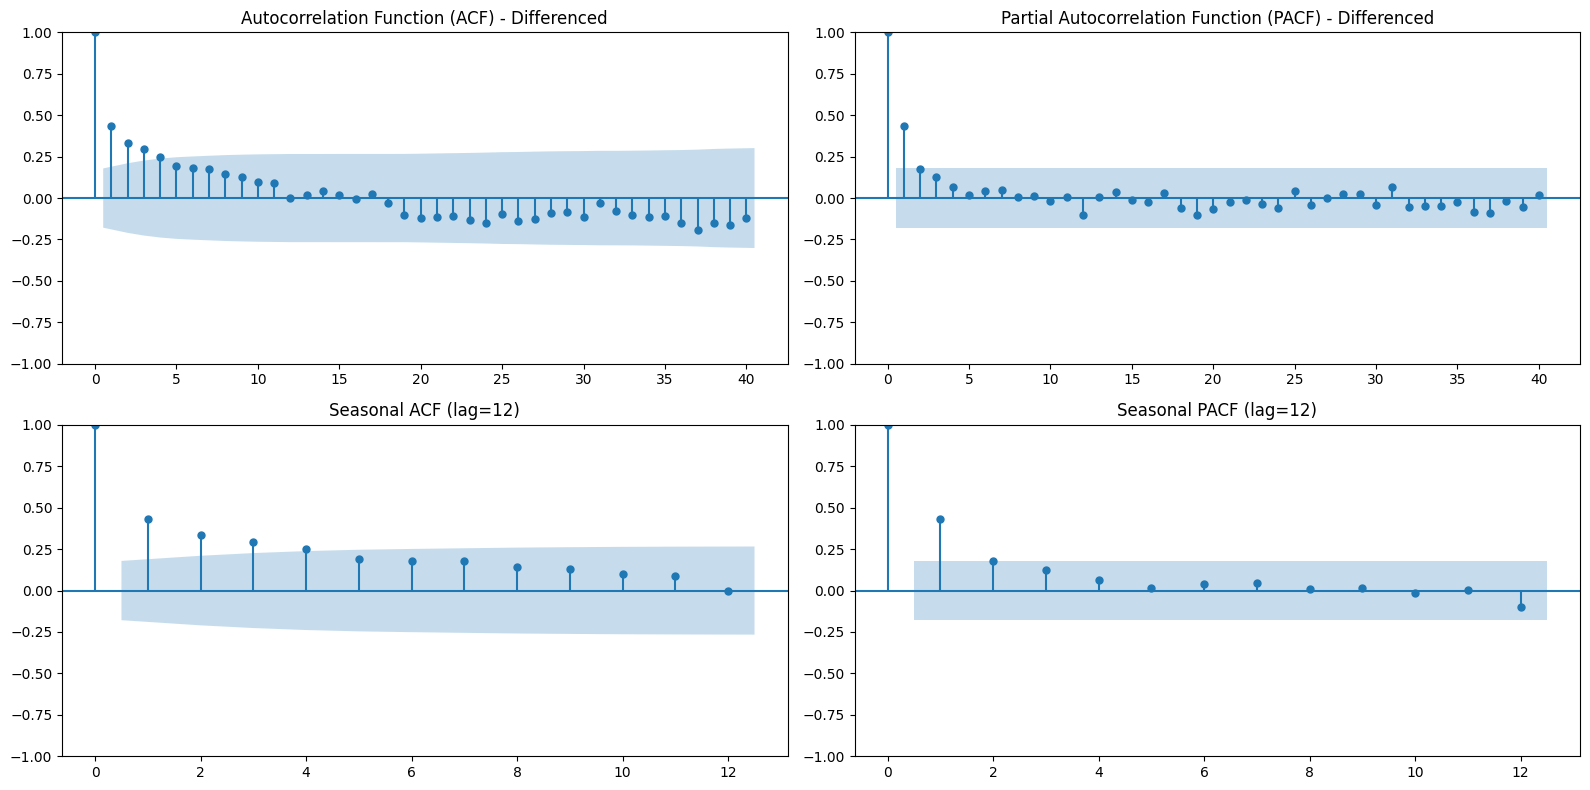

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF dan PACF untuk data yang sudah di-differencing (termasuk seasonal differencing)
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# ACF untuk differencing biasa
plot_acf(df_p['SeasonalDiffRevenue'].dropna(), lags=40, ax=axes[0, 0])
axes[0, 0].set_title('Autocorrelation Function (ACF) - Differenced')

# PACF untuk differencing biasa
plot_pacf(df_p['SeasonalDiffRevenue'].dropna(), lags=40, ax=axes[0, 1])
axes[0, 1].set_title('Partial Autocorrelation Function (PACF) - Differenced')

# ACF untuk seasonal differencing (D)
plot_acf(df_p['SeasonalDiffRevenue'].dropna(), lags=12, ax=axes[1, 0])
axes[1, 0].set_title('Seasonal ACF (lag=12)')

# PACF untuk seasonal differencing (D)
plot_pacf(df_p['SeasonalDiffRevenue'].dropna(), lags=12, ax=axes[1, 1])
axes[1, 1].set_title('Seasonal PACF (lag=12)')

plt.tight_layout()
plt.show()


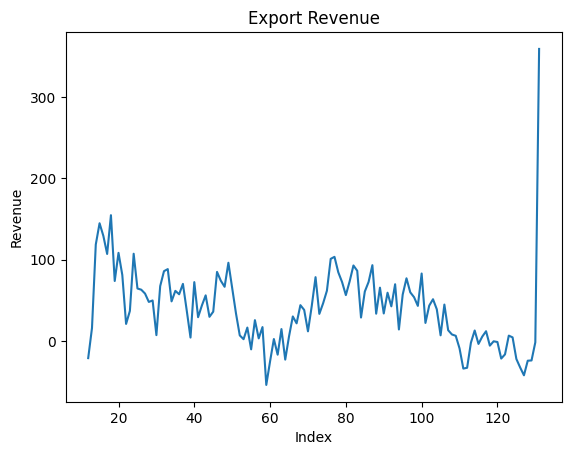

In [ ]:
plt.plot(df_p['SeasonalDiffRevenue'].dropna())
plt.title('Export Revenue')
plt.xlabel('Index')
plt.ylabel('Revenue')
plt.show()

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Tentukan parameter SARIMA
order = (1, 1, 1)  # (p, d, q) untuk ARIMA
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S) untuk musiman, dengan S=12 untuk 12 bulan

# Membangun model SARIMA
model = SARIMAX(df_p['SeasonalDiffRevenue'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Melakukan prediksi
forecast = model_fit.forecast(steps=12)  # Prediksi untuk 12 langkah ke depan
print(f"Forecast for the next 12 periods: {forecast}")


Forecast for the next 12 periods: 132    251.263196
133    173.554553
134    120.976118
135     87.243402
136     65.656983
137     46.431979
138     38.653788
139     27.832622
140     26.299083
141     22.240582
142     19.277087
143     82.553544
Name: predicted_mean, dtype: float64


In [ ]:
seasonal_last_values = df_p['BoxCoxRevenue'].iloc[-12:].values

# Menambahkan nilai seasonal musiman ke forecast differenced
forecast_original = forecast + seasonal_last_values
lambda_boxcox = 0.22

# Hasil forecast yang telah di-differencing (forecast yang sudah dalam bentuk differenced musiman)
# forecast adalah hasil prediksi yang sudah melalui transformasi (misalnya seasonal differencing dan Box-Cox)

# Langkah 1: Mengembalikan nilai forecast dari Box-Cox
forecast_boxcox_original = inv_boxcox(forecast_original, lambda_boxcox)
print("Forecast dalam skala asli:", forecast_boxcox_original)

Forecast dalam skala asli: 132    1.043215e+10
133    5.777528e+09
134    4.877898e+09
135    4.068634e+09
136    3.675045e+09
137    2.619227e+09
138    2.370935e+09
139    2.113639e+09
140    2.546608e+09
141    2.622270e+09
142    2.804345e+09
143    3.603042e+10
Name: predicted_mean, dtype: float64


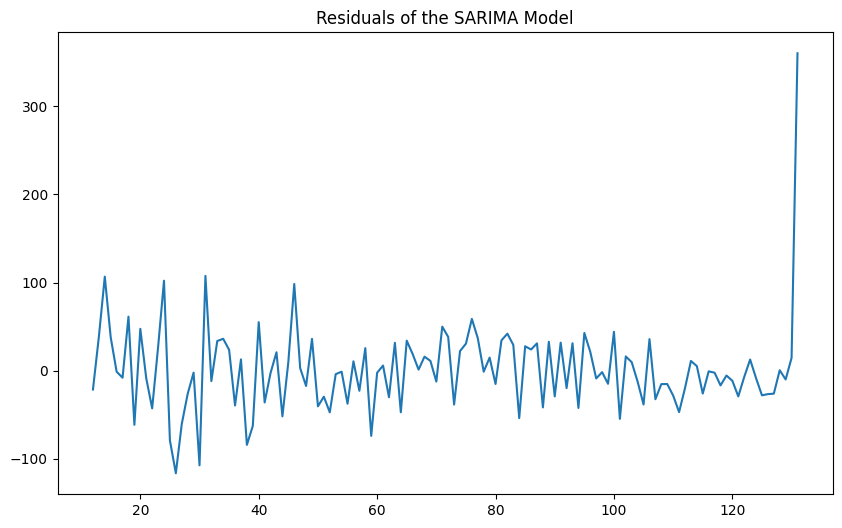

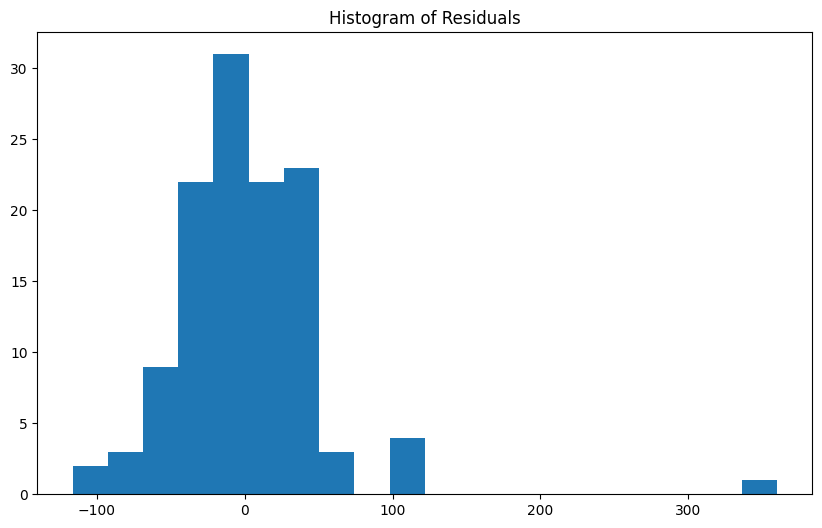

In [14]:
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the SARIMA Model')
plt.show()

# Plot histogram residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.show()


In [18]:
ljung_box_results = acorr_ljungbox(residuals_cleaned, lags=[10, 20, 30], return_df=True)

print(ljung_box_results)

      lb_stat  lb_pvalue
10   2.408043   0.992149
20   6.869542   0.997091
30  13.662354   0.995383


In [15]:
from statsmodels.tsa.stattools import adfuller
residuals_cleaned = residuals.dropna()  # Menghapus nilai NaN
residuals_cleaned = residuals_cleaned[residuals_cleaned != float('inf')]  # Menghapus nilai Inf

test_stationarity(residuals_cleaned)


ADF Statistic: -8.67952694201603
p-value: 4.323819995801316e-14
Data sudah stasioner.
